# Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучить общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [55]:
calls_data = pd.read_csv('/datasets/calls.csv')
internet_data = pd.read_csv('/datasets/internet.csv')
messages_data = pd.read_csv('/datasets/messages.csv')
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
users_data = pd.read_csv('/datasets/users.csv')

Для начала необходимо изучить общую информаию о каждом датасете

In [3]:
display(calls_data.info())
display(calls_data.head(5))
display(calls_data.describe())
print('% пропущенных значений в столобце duration:', round(calls_data[calls_data['duration'] == 0]['duration'].count() / len(calls_data) * 100, 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


% пропущенных значений в столобце duration: 19.55


**call_date** - надо перевести в формат datetime
    
**duration** - Есть почти 20% значений равные 0. Необходимо разобраться в причинах и обработать. Также стоит перевести из float в int с округлением в большую сторону согласно условиям задания.
   

In [4]:
# display(internet_data.info())
display(internet_data.head(5))
display(internet_data.describe())
print('% пропущенных значений в столобце mb_used:', round(internet_data[internet_data['mb_used'] == 0]['mb_used'].count() / len(internet_data) * 100, 2))

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


% пропущенных значений в столобце mb_used: 13.12


**session_date** - надо перевести в формат datetime
**mb_used** - есть почти 13% значений равные 0. Необходимо разобраться в причинах и обработать.

In [5]:
# display(messages_data.info())
display(messages_data.head(5))
display(messages_data.describe())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


**messages_date** - надо перевести в формат datetime


In [6]:
tariffs_data

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
# display(users_data.info())
display(users_data.head(5))
display(users_data.describe())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


**chhurn_date** и **reg_date** - надо перевести в формат datetime

## Подготовить данные

**Привести данные к нужным типам**


In [8]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')

Выполенен перевод значений дат в каждом из датасетов в формат datetime.


____

**Исследуем столбец duration в датасете calls_data и выполним заполнение некорректных значений.**

Построим гистрограмму длительности разговора

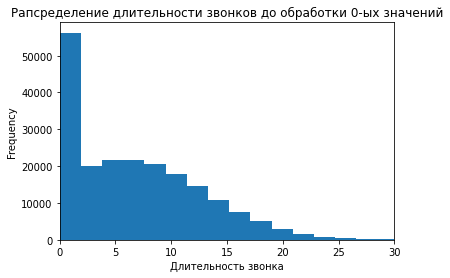

In [9]:
calls_data['duration'].plot(kind='hist',xlim = (0,30), bins = 20)
plt.xlabel('Длительность звонка')
plt.title('Рапсределение длительности звонков до обработки 0-ых значений')
plt.show()

Рассмотрим более внимательно пользователей у которых есть разговоры с длительностью равной 0

In [10]:
calls_data['duration'] = calls_data['duration'].astype('int')
empty_calls_by_user = calls_data[calls_data['duration'] == 0].pivot_table(index = 'user_id', values = 'duration',aggfunc = ['count'])
empty_calls_by_user.columns = ['count']
display(empty_calls_by_user.describe())

,count
count,492.000000
mean,97.412602
std,69.510849
min,5.000000
25%,42.000000
50%,81.000000
75%,137.250000
max,393.000000


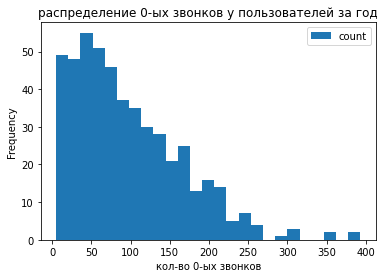

In [11]:
empty_calls_by_user.plot(kind = 'hist', bins = 25)
plt.xlabel('кол-во 0-ых звонков')
plt.title('распределение 0-ых звонков у пользователей за год')
plt.show()

В данных присутсвует большое кол-во нулевых значений в длительности звонка. Причем максимально за год у пользователя было 393 звонка. Сложно сказать, что является причиной их возниковения, для того чтобы ответить на этот вопрос необходимо знать каким образом происходит получение данных.
Можно предположить несколько варинатов: 
   - 0 - означает, что в данных есть ошибка и чтобы получить "чистые" данные необходимо избавиться от 0 и отбросить звонки с 0 временем. Но таких ошибочных данных получается слишком много ~20%.
   
   -  0 - означает, что звонок был, но был очень короткий, и т.к. оператор использует округление в большую сторону, то все 0 надо заменить на 1 минуту.
    
    
На мой взгляд более предпочтителен 2ой вариант, т.к. 20% ошибочных данных о длительности звонков это очень большая величина для мобильного оператора.Также по гистограмме распределения 0-ых звонков у пользователей за год видно, что кол-во таких звонков распределено почти по всем пользователям(492 из 500), а не сосредоточено у малого числа пользователей, но в большом количестве, что явно свидетельствовало бы о "странности" таких звонков. К тому же такая замена значений не должна внести большой вклад в выручку. Максимальное значение, кот-ое добавится к минутам, израсходованным пользователем за год - это 393, что меньше, чем кол-во минут включенных в пакет минут в месяц в любом тарифе.

Выполним замену нулевых значений минут разговора

In [12]:
def convert_duration(row):
    duration_fixed = int(math.ceil(row['duration']))
    return duration_fixed

In [13]:
calls_data['duration'] = calls_data.apply(convert_duration, axis = 1)
calls_data['duration'] = calls_data['duration'].replace(0,1)

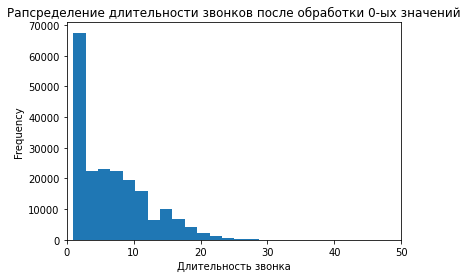

In [14]:
calls_data['duration'].plot(kind='hist',xlim = (0,50), bins = 20)
plt.xlabel('Длительность звонка')
plt.title('Рапсределение длительности звонков после обработки 0-ых значений')
plt.show()

Таким образом выполнена обработка столбца **duration**. Данные приведены в целочисленный формат

___

**Исследуем столбец mb_used с информацией о интернет-сессиях в датасете calls_data и выполним заполнение некорректных значений.**

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

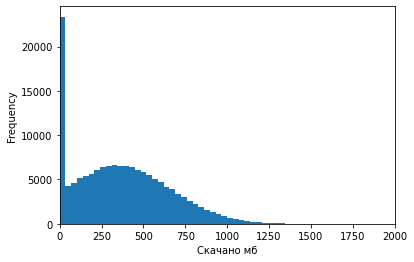

In [15]:
display(internet_data['mb_used'].describe())
internet_data['mb_used'].plot(kind='hist',xlim = (0,2000), bins = 50)
plt.xlabel('Скачано мб')
plt.show()

Проблема аналогична той, что была в данных о длительности звонка. Применим ту же идею для заполнения пропусков.

            count
count  495.000000
mean    39.795960
std     31.472448
min      1.000000
25%     13.000000
50%     31.000000
75%     63.000000
max    144.000000


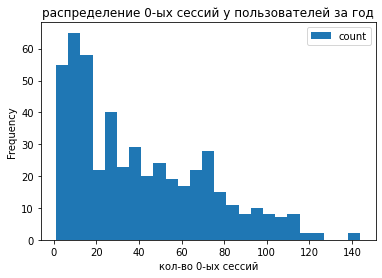

In [16]:
internet_data['mb_used'] = internet_data['mb_used'].astype('int')
empty_sessions_by_user = internet_data[internet_data['mb_used'] == 0].pivot_table(index = 'user_id', values = 'mb_used',aggfunc = ['count'])
empty_sessions_by_user.columns = ['count']
print(empty_sessions_by_user.describe())
empty_sessions_by_user.plot(kind = 'hist', bins = 25)
plt.xlabel('кол-во 0-ых сессий')
plt.title('распределение 0-ых сессий у пользователей за год')
plt.show()


In [17]:
print(internet_data.query('mb_used == 0')['mb_used'].count())
print(internet_data.describe())
def convert_mb_used(row):
    mb_used_fixed = int(math.ceil(row['mb_used']))
    return mb_used_fixed
internet_data['mb_used'] = internet_data.apply(convert_mb_used, axis = 1)
internet_data['mb_used'] = internet_data['mb_used'].replace(0,1)
print(internet_data.describe())

19699
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     369.762223    1252.099842
std     43127.054745     278.214201     144.050823
min         0.000000       0.000000    1000.000000
25%     37348.750000     138.000000    1130.000000
50%     74697.500000     348.000000    1251.000000
75%    112046.250000     559.000000    1380.000000
max    149395.000000    1724.000000    1499.000000
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     369.894080    1252.099842
std     43127.054745     278.039104     144.050823
min         0.000000       1.000000    1000.000000
25%     37348.750000     138.000000    1130.000000
50%     74697.500000     348.000000    1251.000000
75%    112046.250000     559.000000    1380.000000
max    149395.000000    1724.000000    1499.000000


---

Обработка нулевых интернет сессий производится по аналогии, что и обработка нулевых звонков. Все не целые значения округляются в большую сторону, 0 -> 1 мб, тип данных изменен с float на int.

---

**Добавление столбца с месяцем для каждого сообщения, звонка,интернет сессии**

In [18]:
calls_data['call_month'] = calls_data['call_date'].dt.month
internet_data['session_month'] = internet_data['session_date'].dt.month
messages_data['message_month'] = messages_data['message_date'].dt.month
users_data['join_month'] = users_data['reg_date'].dt.month

**Добавление столбца кол-во месяцев month_paid действия тарифа у пользователя, будет использоваться для подсчета выручки по мясяцам**

In [19]:
users_data['months_paid'] = users_data['churn_date'].dt.month.fillna(12) - users_data['reg_date'].dt.month
users_data['months_paid'] = users_data['months_paid'].astype('int')
users_data['months_paid'] = users_data['months_paid'] + 1
# print(users_data['months_paid'].unique())
# print(users_data.info())

----
**добавление tariff_id в соответсвтии с tariff_name**

In [20]:
tariffs_data['tariff_id'] = tariffs_data.index
print(tariffs_data[['tariff_id','tariff_name']])

   tariff_id tariff_name
0          0       smart
1          1       ultra


In [21]:
users_data['tariff_id'] = users_data['tariff'].apply(lambda x: 1 if x == 'ultra' else 0)

Был добавлен столбец tariff_id для того, чтобы использовать его в качестве связи между датасетами.

----

Создадим вспомогательный датасет для подсчета выручки



In [22]:
user_tariff_data = users_data[['user_id','months_paid','tariff_id']].merge(tariffs_data, on="tariff_id", how='outer')
display(user_tariff_data.sort_values('user_id').head(5))

,user_id,months_paid,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,8,1,1000,30720,3000,1950,150,1,1,ultra
149,1001,2,0,50,15360,500,550,200,3,3,smart
150,1002,7,0,50,15360,500,550,200,3,3,smart
1,1003,5,1,1000,30720,3000,1950,150,1,1,ultra
2,1004,8,1,1000,30720,3000,1950,150,1,1,ultra


**Подсчет выручки по звонкам по месяцам**
Рассчитаем кол-во минут разговора по месяцам

In [23]:
calls_by_user_per_month = calls_data.pivot_table(index='user_id',columns='call_month',values='duration',aggfunc='sum')
calls_by_user_per_month.head(5)

call_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,148.0,160.0,307.0,378.0,436.0,323.0,307.0,304.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,387.0
1002,NaN,NaN,NaN,NaN,NaN,106.0,199.0,260.0,195.0,198.0,226.0,219.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354.0,891.0,778.0,755.0,736.0
1004,NaN,NaN,NaN,NaN,32.0,153.0,117.0,120.0,107.0,134.0,107.0,122.0


Теперь объединим таблицы звонков и тарифов. Далее избавимся от NaN и приведем данные к нужному формату int

In [24]:
calls_data_minutes = calls_by_user_per_month.merge(user_tariff_data[['minutes_included','rub_per_minute','tariff_name','user_id','months_paid']], on='user_id', how='outer')
display(calls_data_minutes.head(5))
# избавление от NaN и перевод в int
months =[i for i in range(1,13)]
calls_data_minutes[months] = calls_data_minutes[months].fillna(0)
calls_data_minutes[months] = calls_data_minutes[months].astype('int')
calls_data_paid = calls_data_minutes.copy()
display(calls_data_minutes.head(5))

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,minutes_included,rub_per_minute,tariff_name,months_paid
0,1000,NaN,NaN,NaN,NaN,148.0,160.0,307.0,378.0,436.0,323.0,307.0,304.0,3000,1,ultra,8
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,387.0,500,3,smart,2
2,1002,NaN,NaN,NaN,NaN,NaN,106.0,199.0,260.0,195.0,198.0,226.0,219.0,500,3,smart,7
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354.0,891.0,778.0,755.0,736.0,3000,1,ultra,5
4,1004,NaN,NaN,NaN,NaN,32.0,153.0,117.0,120.0,107.0,134.0,107.0,122.0,3000,1,ultra,8


,user_id,1,2,3,4,5,6,7,8,9,10,11,12,minutes_included,rub_per_minute,tariff_name,months_paid
0,1000,0,0,0,0,148,160,307,378,436,323,307,304,3000,1,ultra,8
1,1001,0,0,0,0,0,0,0,0,0,0,400,387,500,3,smart,2
2,1002,0,0,0,0,0,106,199,260,195,198,226,219,500,3,smart,7
3,1003,0,0,0,0,0,0,0,354,891,778,755,736,3000,1,ultra,5
4,1004,0,0,0,0,32,153,117,120,107,134,107,122,3000,1,ultra,8


Необходимо посчитать сумму выручки в случае превышения лимитов тарифа. Это будет производится при помощи функции paid_for_month_for_calls.

In [25]:
def paid_for_month_for_calls(data_test,month):
    minutes_included = data_test['minutes_included']
    rub_per_minute = data_test['rub_per_minute']
    month_call_paid = 0
    delta_time = minutes_included-data_test[month]
    if (delta_time < 0) and (data_test[month]>0):
        month_call_paid = (-1)*delta_time*rub_per_minute
    else:
        month_call_paid = 0
    return month_call_paid

In [26]:
months =[i for i in range(1,13)]
for month in months:      
    calls_data_paid[month] = calls_data_paid.apply(paid_for_month_for_calls, axis=1, args = [month])
display(calls_data_paid.head(5))
display(calls_data_minutes.head(5))

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,minutes_included,rub_per_minute,tariff_name,months_paid
0,1000,0,0,0,0,0,0,0,0,0,0,0,0,3000,1,ultra,8
1,1001,0,0,0,0,0,0,0,0,0,0,0,0,500,3,smart,2
2,1002,0,0,0,0,0,0,0,0,0,0,0,0,500,3,smart,7
3,1003,0,0,0,0,0,0,0,0,0,0,0,0,3000,1,ultra,5
4,1004,0,0,0,0,0,0,0,0,0,0,0,0,3000,1,ultra,8


,user_id,1,2,3,4,5,6,7,8,9,10,11,12,minutes_included,rub_per_minute,tariff_name,months_paid
0,1000,0,0,0,0,148,160,307,378,436,323,307,304,3000,1,ultra,8
1,1001,0,0,0,0,0,0,0,0,0,0,400,387,500,3,smart,2
2,1002,0,0,0,0,0,106,199,260,195,198,226,219,500,3,smart,7
3,1003,0,0,0,0,0,0,0,354,891,778,755,736,3000,1,ultra,5
4,1004,0,0,0,0,32,153,117,120,107,134,107,122,3000,1,ultra,8



Были подсчитаны минуты разговора и выручка от звонков(если месячный лимит минут по тарифу был превышен) для каждого пользователя по месяцам. Для подсчета использовался датафрейм user_tariff_data, полученный ранее. Для подсчета calls_data_paid была использована функция paid_for_month_for_calls, кот-ая определяла есть ли превышение по лимиту в данной месяце и считала сумму, если превышение было, иначе значение выручки оставалось 0.

**calls_data_minutes** - минуты разговора по месяцам для каждого пользователя.


**calls_data_paid** - выручка от звонков(если месячный лимит минут по тарифу был превышен)
       
----

**Проведем аналогичные расчеты для сообщений.**

In [27]:
messages_by_user_per_month = messages_data.pivot_table(index = 'user_id',columns='message_month', values = 'id', aggfunc = 'count')

In [28]:
# Объединения таблиц сообщений и тарифов
messages_data_amount = messages_by_user_per_month.merge(user_tariff_data[['messages_included','rub_per_message','tariff_name','user_id','months_paid']], on='user_id', how='outer')
# избавление от NaN и перевод в int
months =[i for i in range(1,13)]
messages_data_amount[months] = messages_data_amount[months].fillna(0)
messages_data_amount[months] = messages_data_amount[months].astype('int')
messages_data_paid = messages_data_amount.copy()

In [29]:
def paid_for_month_for_messages(data_test,month):
    messages_included = data_test['messages_included']
    rub_per_message = data_test['rub_per_message']
    month_messages_paid = 0
    delta_messages = messages_included-data_test[month]
    if (delta_messages < 0) and (data_test[month]>0):
        month_messages_paid = (-1)*delta_messages*rub_per_message
    else:
        month_messages_paid = 0
    return month_messages_paid

In [30]:
months =[i for i in range(1,13)]
for month in months:      
    messages_data_paid[month] = messages_data_paid.apply(paid_for_month_for_messages, axis=1, args = [month])
display(messages_data_paid.head(5))

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,messages_included,rub_per_message,tariff_name,months_paid
0,1000,0,0,0,0,0,0,0,0,0,0,0,0,1000,1,ultra,8
1,1002,0,0,0,0,0,0,0,0,0,0,0,0,50,3,smart,7
2,1003,0,0,0,0,0,0,0,0,0,0,0,0,1000,1,ultra,5
3,1004,0,0,0,0,0,0,0,0,0,0,0,0,1000,1,ultra,8
4,1005,0,0,18,0,0,0,18,42,6,0,3,12,50,3,smart,12


**messages_data_amount** - минуты разговора по месяцам для каждого пользователя.


**messages_data_paid** - выручка от звонков(если месячный лимит минут по тарифу был превышен)
       
----

И еще раз только теперь для интернет-трафика

In [31]:
# интернет трафик по месяцам
sessions_by_user_per_month = internet_data.pivot_table(index='user_id',columns='session_month',values='mb_used',aggfunc='sum')

In [32]:
# объединение таблиц интернет сессий и тарифов
sessions_data_mb = sessions_by_user_per_month.merge(user_tariff_data[['mb_per_month_included','rub_per_gb','tariff_name','user_id','months_paid']], on='user_id', how='outer')
# избавление от NaN и перевод в int
months =[i for i in range(1,13)]
sessions_data_mb[months] = sessions_data_mb[months].fillna(0)
sessions_data_mb[months] = sessions_data_mb[months].astype('int')
sessions_data_paid = sessions_data_mb.copy()

In [33]:
def paid_for_month_for_sessions(data_test,month):
    mb_per_month_included = data_test['mb_per_month_included']
    rub_per_gb = data_test['rub_per_gb']
    month_session_paid = 0
    delta_sessions = mb_per_month_included-data_test[month]
    if (delta_sessions < 0) and (data_test[month]>0):
        month_session_paid = (-1)*math.ceil(delta_sessions/1024)*rub_per_gb
    else:
        month_session_paid = 0
    return month_session_paid

In [34]:
months =[i for i in range(1,13)]
for month in months:      
    sessions_data_paid[month] = sessions_data_paid.apply(paid_for_month_for_sessions, axis=1, args = [month])

**sessions_data_mb** - минуты разговора по месяцам для каждого пользователя.
**sessions_data_paid** - выручка от звонков(если месячный лимит минут по тарифу был превышен)

---

**Выполним подсчет выручки с оплаты тарифа в месяц** 

In [35]:
fees_data_paid = users_data[['user_id','join_month','months_paid']].merge(user_tariff_data[['rub_monthly_fee','user_id']], on='user_id', how='outer')

In [36]:
def paid_for_month_for_tariffs(data_test,month):
    join_month = data_test['join_month']
    month_paid = data_test['months_paid']
    rub_monthly_fee = data_test['rub_monthly_fee']
    month_tariff_paid = 0
    if join_month<=month<=join_month+month_paid-1:
#         print('OK')
        month_tariff_paid = rub_monthly_fee
    else:
        month_tariff_paid = 0
    return month_tariff_paid

In [37]:
months =[i for i in range(1,13)]
for month in months:      
    fees_data_paid[month] = fees_data_paid.apply(paid_for_month_for_tariffs, axis=1, args = [month])
display(fees_data_paid.head(5))



,user_id,join_month,months_paid,rub_monthly_fee,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,5,8,1950,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
1,1001,11,2,550,0,0,0,0,0,0,0,0,0,0,550,550
2,1002,6,7,550,0,0,0,0,0,550,550,550,550,550,550,550
3,1003,8,5,1950,0,0,0,0,0,0,0,1950,1950,1950,1950,1950
4,1004,5,8,1950,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950



Был выполнен подсчет суммы, которую уплатил клиент за пользованием тарифов в месяц, с учетом даты его подклчения и даты отключения(если клиент отключился от тарифа).

---

**Наконец необходимо рассчитать суммарную выручку**

In [38]:
months =[i for i in range(1,13)]
df_add = fees_data_paid.set_index('user_id')[months]
df_add = df_add.add(sessions_data_paid.set_index('user_id')[months])
df_add = df_add.add(messages_data_paid.set_index('user_id')[months])
df_add = df_add.add(calls_data_paid.set_index('user_id')[months])
df_add['tariff_name'] = calls_data_minutes.set_index('user_id')['tariff_name']
display(df_add.head(10))
# df_add - датафрем с суммарной выручкой по всем пользователям по месяцам.


,1,2,3,4,5,6,7,8,9,10,11,12,tariff_name
user_id,,,,,,,,,,,,,
1000,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,ultra
1001,0,0,0,0,0,0,0,0,0,0,950,550,smart
1002,0,0,0,0,0,550,950,1350,750,550,1150,950,smart
1003,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,ultra
1004,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,ultra
1005,550,550,748,1039,694,730,643,784,556,1069,580,721,smart
1006,0,550,750,550,550,550,1350,1150,550,1350,550,1150,smart
1007,0,0,0,550,950,565,652,1550,874,550,637,550,smart
1008,0,0,0,0,0,0,0,0,0,0,0,568,smart


### Вывод
Таким образом были получены таблицы с кол-вом минут, сообщений и интернет-трафика в месяц для каждого пользователя. Также были посчитаны выручка от каждого пользователя за месяц для кол-ва минут, сообщений, интернет-трафика, абонентской платы. Суммируя данные о выручке, была получена таблица **df_add** полной выручки от каждого клиента за месяц. Полученный датафрейм будет использоваться для дальнейшего анализа данных.

## Проанализировать данные

 - Опишите поведение клиентов оператора, исходя из выборки.
 - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
 - Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Начнем с исследования информации о звонках для пользователей разных тарифов

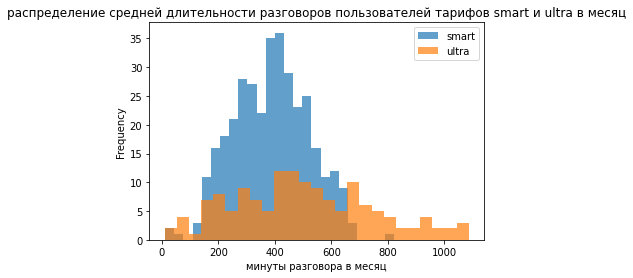

Smart:
Среднее: 387.9582307934027
Медиана: 393.5
Стандартное отклонение: 132.24528271677508
Дисперсия: 17488.81480083977
Ultra:
Среднее: 503.6289695153331
Медиана: 482.125
Стандартное отклонение: 246.95924038219638
Дисперсия: 60988.86641015145


In [39]:
smart_calls = calls_data_minutes.query('tariff_name == "smart"')[calls_data_minutes[months] != 0][months].mean(axis = 1)
ultra_calls = calls_data_minutes.query('tariff_name == "ultra"')[calls_data_minutes[months] != 0][months].mean(axis = 1)
smart_calls.plot( kind ='hist' ,bins = 25, alpha=0.7, label = 'smart')
ultra_calls.plot( kind ='hist' ,bins = 25, alpha=0.7, label = 'ultra')
plt.xlabel('минуты разговора в месяц')
plt.title('распределение средней длительности разговоров пользователей тарифов smart и ultra в месяц')
plt.legend(loc = 'upper right')
plt.show()
print('Smart:')
print('Среднее: {}'.format(smart_calls.mean(axis = 0)))
print('Медиана: {}'.format(smart_calls.median(axis = 0)))
print('Стандартное отклонение: {}'.format(smart_calls.std(axis = 0)))
print('Дисперсия: {}'.format(smart_calls.var(axis = 0)))
print('Ultra:')
print('Среднее: {}'.format(ultra_calls.mean(axis = 0)))
print('Медиана: {}'.format(ultra_calls.median(axis = 0)))
print('Стандартное отклонение: {}'.format(ultra_calls.std(axis = 0)))
print('Дисперсия: {}'.format(ultra_calls.var(axis = 0)))

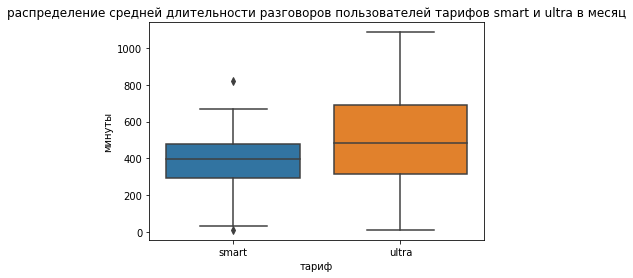

In [40]:
ax = sns.boxplot(data=pd.DataFrame({'smart':smart_calls, 'ultra':ultra_calls}))
plt.xlabel('тариф')
plt.ylabel('минуты')
plt.title('распределение средней длительности разговоров пользователей тарифов smart и ultra в месяц')
plt.show()


Узнаем какой % пользователей платит за использование доп.минут

In [41]:
print('% пользователей тарифа smart кот-ые платят за использование доп.минут',round(100 - st.percentileofscore(smart_calls.fillna(0), 500), 2))
print('% пользователей тарифа ultra кот-ые платят за использование доп.минут',round(100 - st.percentileofscore(ultra_calls.fillna(0), 3000), 2))

% пользователей тарифа smart кот-ые платят за использование доп.минут 20.8
% пользователей тарифа ultra кот-ые платят за использование доп.минут 0.0


### Вывод
Средняя длительность разговора для тарифа ultra больше, чем для smart, как видно из полученных значений средних. Обе гистограммы имеют форму приближенную к симметричной. По видам гистограмм можно сделать вывод, что длительность разговоров у тарифа smart более "прижата" к медианным значениям, в то время как для пользовотелей ultra длительность разговора более "размазана", т.е. пик не так сильно выражен, как для для тарифа smart. Также Об этом свидетельвует величины стандартных отклонений. 21% пользователя smart вынуждены доплачивать за использование доп.минут

----

Теперь рассмотрим информацию о сообщениях

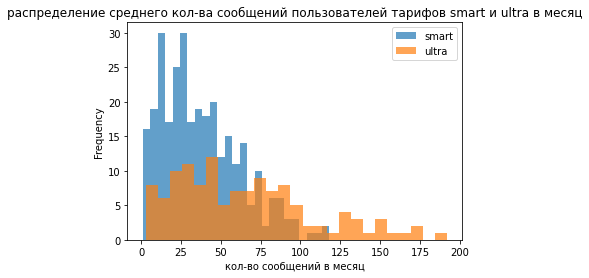

Smart:
Среднее: 37.58
Медиана: 33.00
Стандартное отклонение: 24.85
Дисперсия: 617.51
Ultra:
Среднее: 64.56
Медиана: 57.80
Стандартное отклонение: 43.39
Дисперсия: 1882.75


In [42]:
# messages
smart_messages = messages_data_amount.query('tariff_name == "smart"')[messages_data_amount[months] != 0][months].mean(axis = 1)
ultra_messages = messages_data_amount.query('tariff_name == "ultra"')[messages_data_amount[months] != 0][months].mean(axis = 1)
smart_messages.plot( kind ='hist' ,bins = 25, alpha=0.7, label = 'smart')
ultra_messages.plot( kind ='hist' ,bins = 25, alpha=0.7, label = 'ultra')
plt.xlabel('кол-во сообщений в месяц')
plt.title('распределение среднего кол-ва сообщений пользователей тарифов smart и ultra в месяц')
plt.legend(loc = 'upper right')
plt.show()
print('Smart:')
print('Среднее: {:.2f}'.format(smart_messages.mean(axis = 0)))
print('Медиана: {:.2f}'.format(smart_messages.median(axis = 0)))
print('Стандартное отклонение: {:.2f}'.format(smart_messages.std(axis = 0)))
print('Дисперсия: {:.2f}'.format(smart_messages.var(axis = 0)))
print('Ultra:')
print('Среднее: {:.2f}'.format(ultra_messages.mean(axis = 0)))
print('Медиана: {:.2f}'.format(ultra_messages.median(axis = 0)))
print('Стандартное отклонение: {:.2f}'.format(ultra_messages.std(axis = 0)))
print('Дисперсия: {:.2f}'.format(ultra_messages.var(axis = 0)))

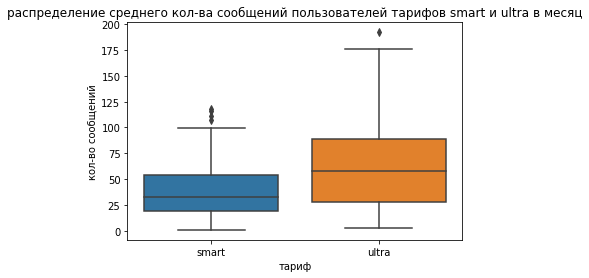

In [43]:
ax = sns.boxplot(data=pd.DataFrame({'smart':smart_messages, 'ultra':ultra_messages}))
plt.xlabel('тариф')
plt.ylabel('кол-во сообщений')
plt.title('распределение среднего кол-ва сообщений пользователей тарифов smart и ultra в месяц')
plt.show()


In [44]:
print('% пользователей тарифа smart кот-ые платят за использование доп.смс',round(100 - st.percentileofscore(smart_messages.fillna(0), 50),2))
print('% пользователей тарифа ultra кот-ые платят за использование доп.смс',round(100 - st.percentileofscore(ultra_messages.fillna(0), 1000),2))


% пользователей тарифа smart кот-ые платят за использование доп.смс 23.08
% пользователей тарифа ultra кот-ые платят за использование доп.смс 0.0


### Вывод
Среднее количество сообщений для тарифа ultra больше, чем для smart почти в 2 раза. Аналогично для гистограмм средней длительности разговора видно, что размах выборки для ultra больше. 23% пользователей smart вынуждены доплачивать за превышение избытка сообщений в месяц

---

Осталось исследовать данные о интернет-трафике клиентов различных тарифов.

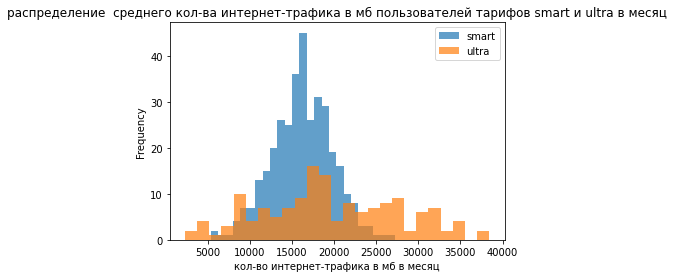

Smart:
Среднее: 16177.68
Медиана: 16256.50
Стандартное отклонение: 3574.47
Дисперсия: 12776854.00
Ultra:
Среднее: 19710.01
Медиана: 18814.00
Стандартное отклонение: 8163.95
Дисперсия: 66650013.17


In [45]:
# sessions
smart_sessions = sessions_data_mb.query('tariff_name == "smart"')[sessions_data_mb[months] != 0][months].mean(axis = 1)
ultra_sessions = sessions_data_mb.query('tariff_name == "ultra"')[sessions_data_mb[months] != 0][months].mean(axis = 1)
smart_sessions.plot( kind ='hist' ,bins = 25, alpha=0.7, label = 'smart')
ultra_sessions.plot( kind ='hist' ,bins = 25, alpha=0.7, label = 'ultra')
plt.xlabel('кол-во интернет-трафика в мб в месяц')
plt.title('распределение  среднего кол-ва интернет-трафика в мб пользователей тарифов smart и ultra в месяц')
plt.legend(loc = 'upper right')
plt.show()
print('Smart:')
print('Среднее: {:.2f}'.format(smart_sessions.mean(axis = 0)))
print('Медиана: {:.2f}'.format(smart_sessions.median(axis = 0)))
print('Стандартное отклонение: {:.2f}'.format(smart_sessions.std(axis = 0)))
print('Дисперсия: {:.2f}'.format(smart_sessions.var(axis = 0)))
print('Ultra:')
print('Среднее: {:.2f}'.format(ultra_sessions.mean(axis = 0)))
print('Медиана: {:.2f}'.format(ultra_sessions.median(axis = 0)))
print('Стандартное отклонение: {:.2f}'.format(ultra_sessions.std(axis = 0)))
print('Дисперсия: {:.2f}'.format(ultra_sessions.var(axis = 0)))

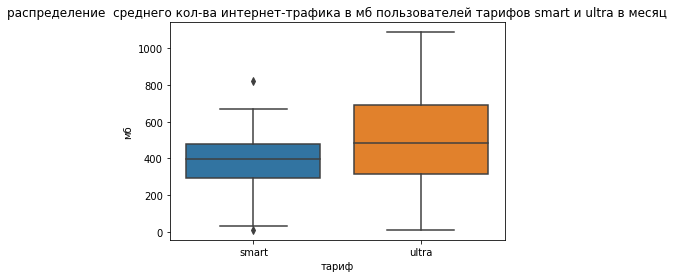

In [46]:
ax = sns.boxplot(data=pd.DataFrame({'smart':smart_calls, 'ultra':ultra_calls}))
plt.xlabel('тариф')
plt.ylabel('мб')
plt.title('распределение  среднего кол-ва интернет-трафика в мб пользователей тарифов smart и ultra в месяц')
plt.show()

In [47]:
print(100 - st.percentileofscore(smart_sessions.fillna(0), 15360))
print(100 - st.percentileofscore(smart_sessions.fillna(0), 19456))
print(100 - st.percentileofscore(ultra_sessions.fillna(0), 30620))

61.25356125356125
17.37891737891738
11.40939597315436


### Вывод
Среднее кол-во интернет трафика израсходованного пользователями ultra больше чем пользователями smart, но различия уже не такие большие, как для сообщений и минут звонков. Интересно заметить, что более половины пользователей (~61%) smart не хватает 15гб трафика, если бы лимита было 19гб, то его хватило бы 83% пользователей. Для пользователей ultra тем кому не хватает трафика меньше, их ~13%.


---

## Проверка гипотез
1) средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

2) средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


    Пороговое значение alpha задайте самостоятельно.
    Поясните:
    как вы формулировали нулевую и альтернативную гипотезы;
    какой критерий использовали для проверки гипотез и почему.

Зададим уровень статистической значимости равному 0.05

In [50]:
alpha = 0.05

Проверим первую гипотезу:

*Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается*

**Нулевая гипотеза** - средние обоих выборок равны между собой.


**Альтернативная** - средние обоих выборок  не равны между собой.


Для проверки гипотезы использовался t-критерий для двух независимых выборок.
    Параметр qual_var = False, т.к очевидно, что дисперсии выборок сильно различаются. 


In [51]:
smart_mean_paid_monthly = df_add.query('tariff_name == "smart"')[df_add[months] != 0][months].mean(axis = 1)
ultra_mean_paid_monthly = df_add.query('tariff_name == "ultra"')[df_add[months] != 0][months].mean(axis = 1)
results = st.ttest_ind(
    smart_mean_paid_monthly, 
    ultra_mean_paid_monthly)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.092406510227335e-62
Отвергаем нулевую гипотезу


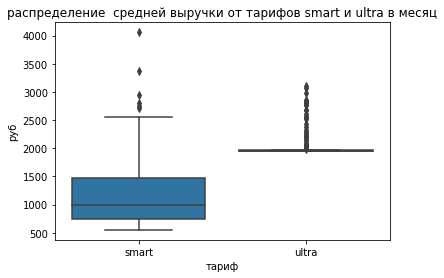

In [52]:
ax = sns.boxplot(data=pd.DataFrame({'smart':smart_mean_paid_monthly, 'ultra':ultra_mean_paid_monthly}))
plt.xlabel('тариф')
plt.ylabel('руб')
plt.title('распределение  средней выручки от тарифов smart и ultra в месяц')
plt.show()

### Вывод
При заданном уровне значимости нулевая гипотеза была отврегнута. Что вполне соответсвует гистограммам разамаха для выручек от представленных тарифов.


---

Проверим вторую гипотезу:

*Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.*

**Нулевая гипотеза** - средние обоих выборок равны между собой.


**Альтернативная** - средние обоих выборок не равны между собой..


Для проверки гипотезы использовался t-критерий для двух независимых выборок.
    Параметр qual_var = False, т.к нет уверенности, что выборки взяты из схожих по параметрам совокупностей. 

In [53]:
#
df_add['city']=users_data.set_index('user_id')['city']
# print(df_add.head(5))
moscow_users = df_add.query('city == "Москва"')[df_add[months] != 0][months].mean(axis = 1)
other_users = df_add.query('city != "Москва"')[df_add[months] != 0][months].mean(axis = 1)
print(moscow_users.describe())
print(other_users.describe())

results = st.ttest_ind(
    moscow_users, 
    other_users, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

count      99.000000
mean     1387.895203
std       609.661161
min       550.000000
25%       829.166667
50%      1385.250000
75%      1950.000000
max      2741.000000
dtype: float64
count     401.000000
mean     1438.305273
std       642.296019
min       550.000000
25%       849.500000
50%      1378.888889
75%      1950.000000
max      4059.000000
dtype: float64
p-значение: 0.46716450606912197
Не получилось отвергнуть нулевую гипотезу


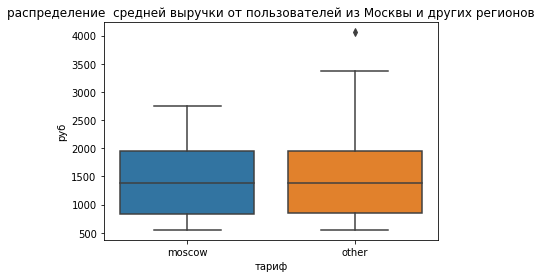

In [54]:
ax = sns.boxplot(data=pd.DataFrame({'moscow':moscow_users, 'other':other_users}))
plt.xlabel('тариф')
plt.ylabel('руб')
plt.title('распределение  средней выручки от пользователей из Москвы и других регионов')
plt.show()

### Вывод

При заданном уровне значимости нулевую гипотезу отврегнуть не получилось. Что вполне соответсвует гистограммам размаха для выручек от представленных тарифов.


---

## Общий итог

В ходе выполнения проекта был произведен исследовательский анализ данных, в результате, которого были предположены причины пропусков в данных, а также были предложены методы их заполнения. Были построены датафреймы, которые позволяют узнать информацию о суммарной выручки по месяцам для каждого клиента. На основе полученных данных были получены распределения использование звонков, сообщений и интернета клиентами различных тарифов. Затем были выдвинуты и проверены статистические гипотезы:
 - *Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается*
 - *Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.*
 
В результате выполнения t-тестов для независимых выборок удалось отвергнуть первую гипотезу о том, что средняя выручка для пользователей разных тарифов отличается, но гипотезу о различных выручках между Москвой и другими регионами отвергнуть не удалось.

Таким образом, можно сказать, что тариф **ultra** приносит больше выручки в месяц, его продвижение должно принести компании больше приыбли.
